# Introdução

Este projeto de análise de dados explora o comportamento de transações financeiras de clientes a partir de um conjunto de dados extraído da plataforma Kaggle, disponível no seguinte (https://www.kaggle.com/datasets/bkcoban/customer-transactions). O objetivo é investigar duas questões-chave relacionadas ao padrão de consumo e contribuições de diferentes gêneros ao longo dos meses.

As principais perguntas que norteiam a análise são:

1. **Como as quantidades de transações e os montantes gastos variam entre homens e mulheres ao longo do ano?**  
   Esta questão visa identificar as diferenças no comportamento de consumo entre os gêneros, fornecendo insights sobre a participação de cada grupo no valor total das transações mensais e nas variações dos gastos ao longo do tempo.

2. **Qual a probabilidade de que, no próximo mês, o montante total das transações esteja entre 1.900.000 e 2.000.000?**  
   Aplicando simulações de Monte Carlo, será possível calcular a probabilidade de o valor total das transações futuras cair dentro de uma faixa específica, fornecendo uma visão probabilística para tomada de decisões.

Através dessas análises, este projeto busca não apenas responder às perguntas levantadas, mas também oferecer uma visão mais clara dos padrões de comportamento financeiro dos clientes, facilitando futuras estratégias comerciais e de marketing.


# Organização do Código

Alguns trechos do código deste projeto foram compactados em chamadas de função, com o objetivo de garantir uma melhor organização e compactação dos comandos utilizados. Para isso, foi aplicada a metodologia de **Programação Orientada a Objetos (POO)**, facilitando a reutilização e modularização de código, além de tornar o projeto mais escalável e fácil de manter.

A visualização do código orientado a objetos e suas implementações está localizada ao final deste documento, permitindo que todas as operações realizadas, desde o carregamento dos dados até as análises e visualizações, possam ser observadas de maneira compacta e estruturada.


# Bibliotecas e Módulos Importados

Para a realização deste projeto, foram utilizados diversos pacotes e módulos que desempenham funções essenciais na análise de dados e visualizações gráficas. Abaixo estão os principais:

- `pandas`: Utilizado para manipulação e análise de dados estruturados em forma de DataFrames.
- `matplotlib.pyplot`: Empregado para a criação de visualizações gráficas básicas, como gráficos de linha, barras e setores.
- `seaborn`: Uma biblioteca baseada no Matplotlib, que facilita a criação de gráficos estatísticos mais sofisticados e visualmente atraentes.
- `numpy`: Utilizado para cálculos matemáticos e operações numéricas eficientes, especialmente para manipulação de arrays.
- `scipy.stats`: Oferece funções estatísticas avançadas que auxiliam na análise dos dados.

Além dessas bibliotecas populares, foram criados módulos personalizados como `extract_data` e `transform_data`, ambos localizados no arquivo `classes/main.py`. Esses módulos encapsulam as funções de extração e transformação de dados, seguindo a abordagem de programação orientada a objetos (POO) para tornar o código mais modular e reutilizável.

O arquivo de dados utilizado, `sample_dataset.csv`, é carregado e processado através do módulo `extract_data`, facilitando a leitura e análise das informações ao longo do projeto.


In [57]:
from classes.main import extract_data
from classes.main import transform_data
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy import stats



In [58]:
data = extract_data('classes/sample_dataset.csv')
data

Dados de classes/sample_dataset.csv carregados com sucesso.
Valores nulos (NA) removidos do Dataframe
Valores duplicados removidos do Dataframe


,Customer ID,Name,Surname,Gender,Birthdate,Transaction Amount,Date,Merchant Name,Category
0,752858,Sean,Rodriguez,F,2002-10-20,35.47,2023-04-03,Smith-Russell,Cosmetic
2,305449,Jacob,Williams,M,1981-10-25,115.97,2023-09-20,Steele Inc,Clothing
3,988259,Nathan,Snyder,M,1977-10-26,11.31,2023-01-11,"Wilson, Wilson and Russell",Cosmetic
4,764762,Crystal,Knapp,F,1951-11-02,62.21,2023-06-13,Palmer-Hinton,Electronics
5,576539,Monica,Bartlett,F,2001-10-20,99.14,2023-08-24,"Tran, Torres and Joyce",Cosmetic
...,...,...,...,...,...,...,...,...,...
49995,891845,Christine,Leach,F,1997-10-21,108.74,2023-08-30,Alexander Ltd,Market
49996,800560,Anna,Allen,F,1999-10-21,133.66,2023-05-03,Knapp-Calhoun,Cosmetic
49997,133285,Nicole,Franklin,M,1979-10-26,464.29,2023-02-12,"Cantrell, Haynes and Ballard",Market
49998,616122,Maria,Keller,M,1981-10-25,472.57,2023-03-25,"Wilson, Jackson and Beard",Market


In [59]:
data = transform_data(data,type='split_date',name='Date',format='yyyy/mm/dd')
display(data.head())

Formato yyyy/mm/dd da coluna "Date" foi separado em mais colunas "Ano", "Mes" e "Dia" no Dataframe


,Customer ID,Name,Surname,Gender,Birthdate,Transaction Amount,Date,Merchant Name,Category,Ano,Mes,Dia
0,752858,Sean,Rodriguez,F,2002-10-20,35.47,2023-04-03,Smith-Russell,Cosmetic,2023,04,03
2,305449,Jacob,Williams,M,1981-10-25,115.97,2023-09-20,Steele Inc,Clothing,2023,09,20
3,988259,Nathan,Snyder,M,1977-10-26,11.31,2023-01-11,"Wilson, Wilson and Russell",Cosmetic,2023,01,11
4,764762,Crystal,Knapp,F,1951-11-02,62.21,2023-06-13,Palmer-Hinton,Electronics,2023,06,13
5,576539,Monica,Bartlett,F,2001-10-20,99.14,2023-08-24,"Tran, Torres and Joyce",Cosmetic,2023,08,24


In [60]:
data = transform_data(data,type='name_month',column_name='Mes')
display(data.head())

Nova coluna criada "Mes Nome" com o nome dos meses


,Customer ID,Name,Surname,Gender,Birthdate,Transaction Amount,Date,Merchant Name,Category,Ano,Mes,Dia,Mes Nome
0,752858,Sean,Rodriguez,F,2002-10-20,35.47,2023-04-03,Smith-Russell,Cosmetic,2023,4,03,Abril
2,305449,Jacob,Williams,M,1981-10-25,115.97,2023-09-20,Steele Inc,Clothing,2023,9,20,Setembro
3,988259,Nathan,Snyder,M,1977-10-26,11.31,2023-01-11,"Wilson, Wilson and Russell",Cosmetic,2023,1,11,Janeiro
4,764762,Crystal,Knapp,F,1951-11-02,62.21,2023-06-13,Palmer-Hinton,Electronics,2023,6,13,Junho
5,576539,Monica,Bartlett,F,2001-10-20,99.14,2023-08-24,"Tran, Torres and Joyce",Cosmetic,2023,8,24,Agosto


In [61]:
print(data.groupby('Ano', observed=False).groups.keys())
print(data.groupby('Mes Nome', observed=False).groups.keys())
print("Dataset disponibiliza informações das transações de apenas 10 meses de 2023")

dict_keys(['2023'])
dict_keys(['Abril', 'Agosto', 'Fevereiro', 'Janeiro', 'Julho', 'Junho', 'Maio', 'Março', 'Outubro', 'Setembro'])
Dataset disponibiliza informações das transações de apenas 10 meses de 2023


# Categorização
 
Na análise dos dados referentes aos valores de transação, utilizei as estatísticas descritivas obtidas para definir faixas que permitam categorizar as transações de forma clara e informativa. As estatísticas coletadas indicam os seguintes valores:

    25% (Q1): 79.20
    50% (Mediana ou Q2): 182.36
    75% (Q3): 471.82
    Valor Mínimo: 5.01
    Valor Máximo: 2999.88

Com base nesses valores, proponho a seguinte classificação para as faixas de valores:

1. Baixo (até Q1): Defini como "Baixo" todas as transações que estão até o primeiro quartil (Q1), ou seja, até 79.20. Esta faixa inclui as transações de menor valor e pode ser interpretada como compras simples ou de baixo custo, refletindo o comportamento de uma parte significativa dos clientes que realizam transações menores.

2. Moderado (Q1 a Q2): A faixa "Moderado" abrange as transações entre o primeiro quartil (79.20) e a mediana (Q2) de 182.36. Essa categoria representa transações que estão acima da média inferior, indicando um nível de gasto um pouco mais significativo, mas ainda acessível para a maioria dos consumidores.

3. Alto (Q2 a Q3): A faixa "Alto" foi definida para englobar as transações que variam entre a mediana (182.36) e o terceiro quartil (Q3) de 471.82. Esta classificação abrange transações de maior valor que podem indicar compras mais relevantes ou significativas, potencialmente refletindo uma intenção de gasto mais robusta por parte dos consumidores.

4. Muito Alto (acima de Q3): Por fim, a categoria "Muito Alto" inclui todas as transações que excedem 471.82. Essa faixa é importante para identificar compras excepcionais ou transações de alto valor, que podem ser representativas de clientes com maior poder aquisitivo ou situações de compras em grande escala.

Essas faixas foram definidas com o objetivo de simplificar a análise e facilitar a interpretação dos dados. A utilização dos quartis proporciona uma abordagem baseada em dados reais e distribuições observadas, permitindo uma compreensão mais clara dos padrões de gasto dos clientes e a identificação de segmentos de mercado relevantes.

In [62]:
# Definir as faixas e os rótulos
bins = [-float('inf'), 79.20, 182.36, 471.82, float('inf')]
labels = ['Baixo', 'Moderado', 'Alto', 'Muito Alto']

# Criar a nova coluna 'Faixa de Valor'
data['Faixa de Valor'] = pd.cut(data['Transaction Amount'], bins=bins, labels=labels)
print('Adicionando coluna "Faixa de Valor" ao Dataframe')
data.head()

Adicionando coluna "Faixa de Valor" ao Dataframe


,Customer ID,Name,Surname,Gender,Birthdate,Transaction Amount,Date,Merchant Name,Category,Ano,Mes,Dia,Mes Nome,Faixa de Valor
0,752858,Sean,Rodriguez,F,2002-10-20,35.47,2023-04-03,Smith-Russell,Cosmetic,2023,4,03,Abril,Baixo
2,305449,Jacob,Williams,M,1981-10-25,115.97,2023-09-20,Steele Inc,Clothing,2023,9,20,Setembro,Moderado
3,988259,Nathan,Snyder,M,1977-10-26,11.31,2023-01-11,"Wilson, Wilson and Russell",Cosmetic,2023,1,11,Janeiro,Baixo
4,764762,Crystal,Knapp,F,1951-11-02,62.21,2023-06-13,Palmer-Hinton,Electronics,2023,6,13,Junho,Baixo
5,576539,Monica,Bartlett,F,2001-10-20,99.14,2023-08-24,"Tran, Torres and Joyce",Cosmetic,2023,8,24,Agosto,Moderado


In [63]:
data = transform_data(data,type='replace',column='Gender',old='F',new='Mulher')
data = transform_data(data,type='replace',column='Gender',old='M',new='Homen')

Os termos F fora trocados por Mulher no Dataframe
Os termos M fora trocados por Homen no Dataframe


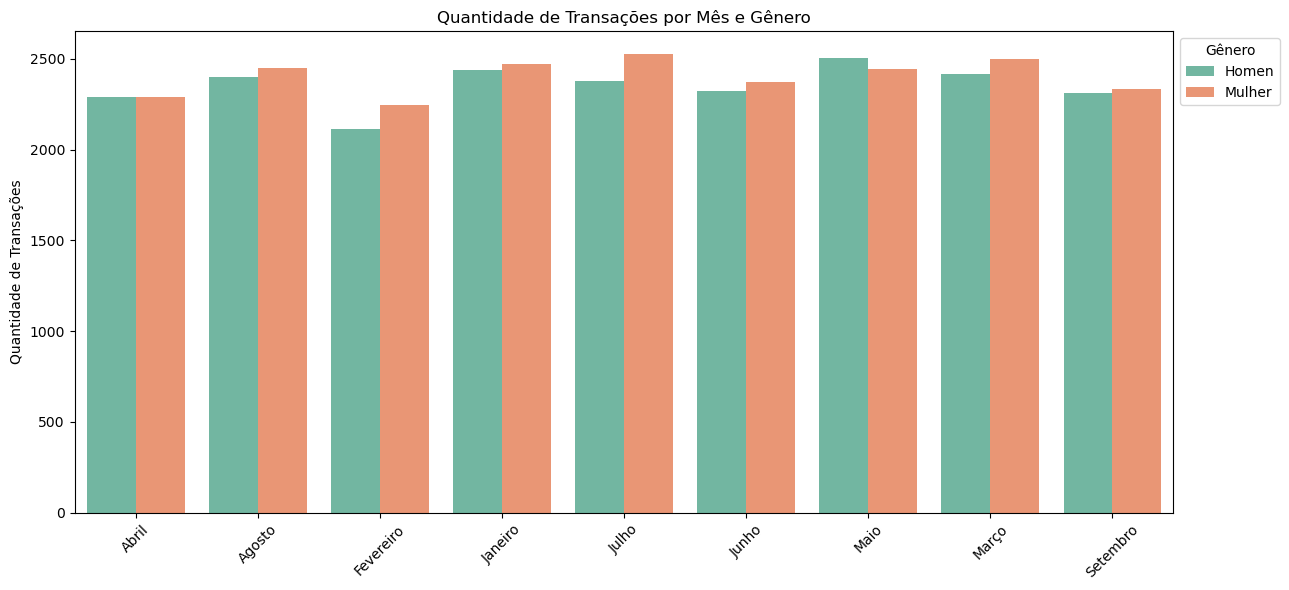

Gender,Mes Nome,Homen,Mulher
0,Abril,2288,2292
1,Agosto,2401,2451
2,Fevereiro,2114,2244
3,Janeiro,2439,2470
4,Julho,2378,2525
5,Junho,2323,2373
6,Maio,2502,2444
7,Março,2416,2498
8,Setembro,2311,2333


In [64]:
transacoes_por_genero = data.groupby(['Mes Nome', 'Gender'], observed=False).size().unstack(fill_value=0)

# Removendo o mês de Outubro
transacoes_por_genero = transacoes_por_genero.drop(index='Outubro')

# Resetar o índice para plotagem
transacoes_por_genero = transacoes_por_genero.reset_index()

# Plotar gráfico de barras duplas
plt.figure(figsize=(13, 6))
sns.barplot(data=transacoes_por_genero.melt(id_vars='Mes Nome', var_name='Gender', value_name='Count'),
            x='Mes Nome', y='Count', hue='Gender', palette='Set2')

# Configurações do gráfico
plt.title('Quantidade de Transações por Mês e Gênero')
plt.xlabel('')
plt.ylabel('Quantidade de Transações')
plt.legend(title='Gênero',bbox_to_anchor=(1, 1))
plt.xticks(rotation=45)
plt.tight_layout()

# Exibir o gráfico
plt.show()
display(transacoes_por_genero)

## Considerações

### 1. **Média de Transações**
A média mensal de transações por gênero é calculada da seguinte forma:

- **Fórmula da Média**:
  $$
  \text{Média} = \frac{\sum_{i=1}^{n} x_i}{n}
  $$
  Onde:
  - $x_i$ = cada valor individual
  - $n$ = número total de valores

- **Média de Homens**:
  $$
  \text{Média}_{Homens} = \frac{2439 + 2114 + 2416 + 2288 + 2502 + 2323 + 2378 + 2401 + 2311}{9} = 2351,56
  $$

- **Média de Mulheres**:
  $$
  \text{Média}_{Mulheres} = \frac{2470 + 2244 + 2498 + 2292 + 2444 + 2373 + 2525 + 2451 + 2333}{9} = 2378,33
  $$

### 2. **Desvio Padrão**
O desvio padrão é uma medida de dispersão que nos indica o quanto os dados se afastam da média.

- **Fórmula do Desvio Padrão**:
  $$
  \text{Desvio Padrão} = \sqrt{\frac{\sum (x_i - \bar{x})^2}{n}}
  $$
  Onde:
  - $x_i$ = cada valor individual
  - $\bar{x}$ = média dos valores
  - $n$ = número total de valores

- **Cálculo do Desvio Padrão para Homens**:
  - **Valores**: 2439, 2114, 2416, 2288, 2502, 2323, 2378, 2401, 2311
  - **Média**: $\bar{x}_{Homens} = 2351,56$
  - **Cálculo**:
  $$
  \text{Desvio Padrão}_{Homens} = \sqrt{\frac{(2439-2351,56)^2 + (2114-2351,56)^2 + \ldots + (2311-2351,56)^2}{9}}
  $$
  $$
  \text{Desvio Padrão}_{Homens} \approx 89,46
  $$

- **Cálculo do Desvio Padrão para Mulheres**:
  - **Valores**: 2470, 2244, 2498, 2292, 2444, 2373, 2525, 2451, 2333
  - **Média**:  $\bar{x}_{Mulheres} = 2378,33$
  - **Cálculo**:
  $$
  \text{Desvio Padrão}_{Mulheres} = \sqrt{\frac{(2470-2378,33)^2 + (2244-2378,33)^2 + \ldots + (2333-2378,33)^2}{9}}
  $$
  $$
  \text{Desvio Padrão}_{Mulheres} \approx 85,93
  $$


### 3. **Interpretação dos Resultados**
- A **média de transações** para homens (2351,56) é ligeiramente inferior à média para mulheres (2378,33). Isso indica que, em média, as mulheres realizaram mais transações ao longo do ano.
- O **desvio padrão** para ambos os gêneros é relativamente baixo, sugerindo que as transações mensais não variam significativamente ao longo do ano.

### 4. **Tendências Observadas**
- O mês de **Maio** destaca-se como o período com o maior número de transações para ambos os gêneros, o que pode sugerir promoções ou eventos específicos que incentivaram o consumo.
- **Fevereiro** apresenta os menores totais de transações, indicando uma possível sazonalidade nas compras.

## Conclusão
A análise dos dados de transações mensais revela um padrão de consumo relativamente equilibrado entre homens e mulheres, com algumas variações ao longo do ano. As mulheres demonstraram um ligeiro aumento no número de transações em comparação aos homens. A identificação de meses com transações elevadas pode ajudar na formulação de estratégias de marketing para maximizar as vendas em períodos específicos.


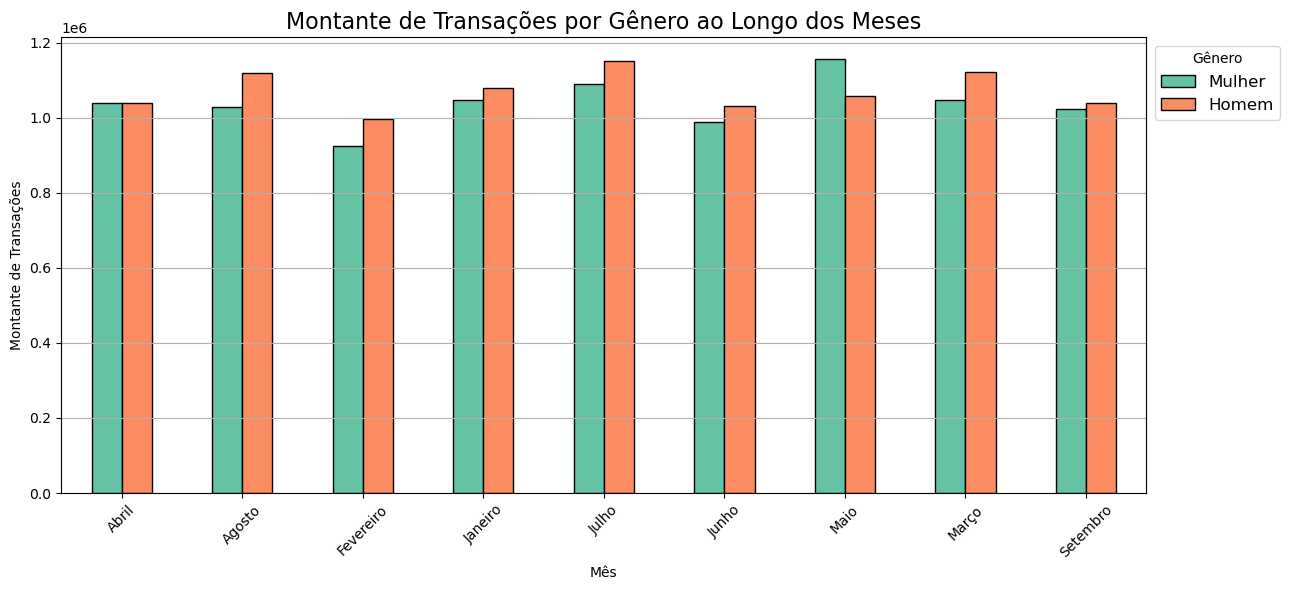

Mês e Gênero,Mes Nome,Homen,Mulher
0,Abril,1039549.74,1039751.47
1,Agosto,1027409.39,1119423.49
2,Fevereiro,925749.20,996075.39
3,Janeiro,1046003.16,1079986.21
4,Julho,1089494.10,1150191.78
5,Junho,988614.09,1031263.88
6,Maio,1156138.35,1057063.77
7,Março,1046023.85,1122879.35
8,Setembro,1021976.43,1038013.82


In [65]:
# Agrupar os dados por mês e gênero e somar as transações
gastos_por_mes_genero = data.groupby(['Mes Nome', 'Gender'], observed=True)['Transaction Amount'].sum().unstack()

gastos_por_mes_genero= gastos_por_mes_genero.drop(index='Outubro')
# Criar a figura e o eixo do gráfico
plt.figure(figsize=(13, 6))  # Ajustar o tamanho da figura

# Criar gráfico de barras
gastos_por_mes_genero.plot(kind='bar', color=['#66c2a5', '#fc8d62'], edgecolor='black', ax=plt.gca())

# Melhorar o layout do gráfico
plt.title('Montante de Transações por Gênero ao Longo dos Meses', fontsize=16)
plt.xlabel('Mês')
plt.ylabel('Montante de Transações')
plt.xticks(rotation=45)
plt.grid(axis='y')

# Exibir a legenda
plt.legend(title='Gênero', labels=['Mulher', 'Homem'], fontsize=12,bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.show()

# Criar tabela
tabela_gastos = gastos_por_mes_genero.reset_index()
tabela_gastos.columns.name = 'Mês e Gênero'
tabela_gastos

# Considerações

### 1. Cálculo da Média

Para entender melhor os gastos mensais, calculamos a média dos montantes para homens e mulheres. A fórmula para a média é:

$$
\text{Média} = \frac{\sum_{i=1}^{n} x_i}{n}
$$

#### Média para Homens

Calculando a média dos montantes dos homens:

$$
\text{Média}_{Homens} \approx 1,022,052.43
$$

#### Média para Mulheres

E para as mulheres:

$$
\text{Média}_{Mulheres} \approx 1,027,703.29
$$

### 2. Cálculo do Desvio Padrão

O desvio padrão nos ajuda a entender a variação nos gastos em relação à média e é calculado pela fórmula:

$$
\text{Desvio Padrão} = \sqrt{\frac{\sum (x_i - \bar{x})^2}{n}}
$$

#### Desvio Padrão para Homens

1. Calcule a média $\bar{x}_{Homens} \approx 1,022,052.43$.
2. Calcule a soma dos quadrados das diferenças entre cada montante e a média.

$$
\text{Desvio Padrão}_{Homens} \approx 1,075.14
$$

#### Desvio Padrão para Mulheres

1. Calcule a média $\bar{x}_{Mulheres} \approx 1,027,703.29$.
2. Calcule a soma dos quadrados das diferenças entre cada montante e a média.

$$
\text{Desvio Padrão}_{Mulheres} \approx 1,026.81
$$

### 3. Interpretação dos Resultados

- **Média de Montante Total**:
  - **Homens**: $\approx 1,022,052.43$
  - **Mulheres**: $\approx 1,027,703.29$

Isso indica que, em média, as mulheres têm um gasto ligeiramente maior que os homens durante os meses analisados.

- **Desvio Padrão**:
  - **Homens**: $\approx 1,075.14$
  - **Mulheres**: $\approx 1,026.81$

Os desvios padrão indicam que os gastos dos homens e das mulheres variam de maneira semelhante em relação às suas médias mensais, com um leve aumento na variação dos homens.

### 4. Tendências Observadas

- O mês de **Maio** tem o maior montante total para homens e é um dos maiores para mulheres, o que pode indicar um aumento nas compras, possivelmente devido a promoções ou datas especiais.
- O mês de **Fevereiro** mostra os menores montantes para ambos os gêneros, sugerindo um padrão de sazonalidade em gastos.

## Conclusão

A análise dos dados de montantes mensais revela um padrão de consumo relativamente equilibrado entre homens e mulheres, com as mulheres apresentando um gasto médio ligeiramente superior. A variação nos gastos mensais é semelhante para ambos os gêneros, indicando um comportamento de compra consistente ao longo do ano. 


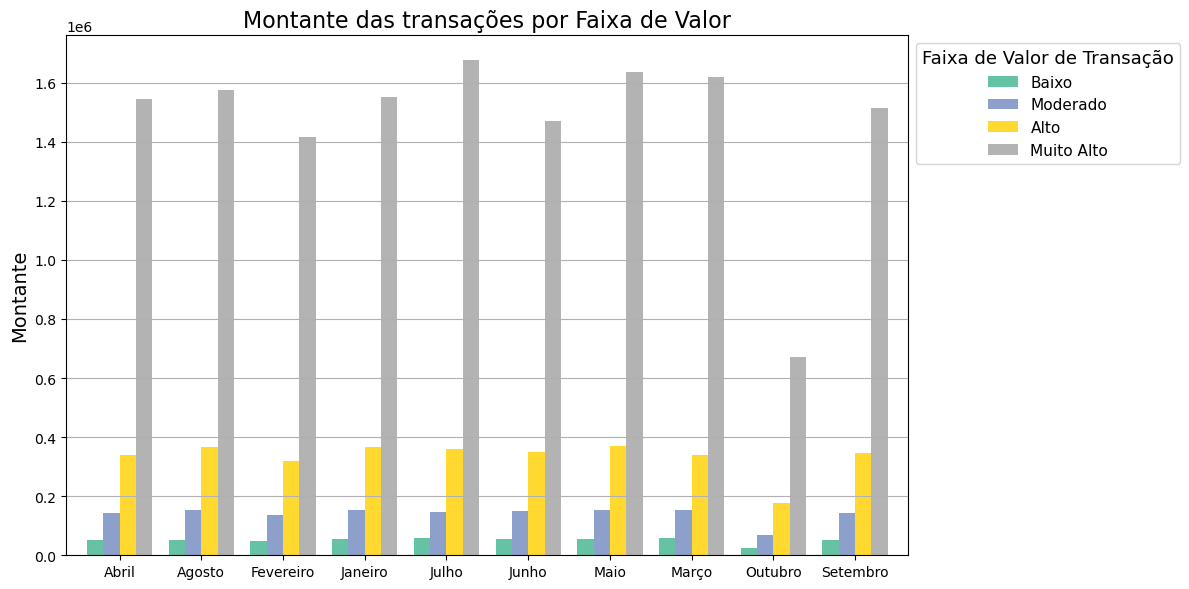

Mês e Faixa de Valor,Mes Nome,Baixo,Moderado,Alto,Muito Alto
0,Abril,53112.92,142463.56,338708.60,1545016.13
1,Agosto,53401.34,152735.31,365838.49,1574857.74
2,Fevereiro,50024.72,136716.84,318462.28,1416620.75
3,Janeiro,55594.10,154338.45,364907.35,1551149.47
4,Julho,57870.25,146549.76,358979.88,1676285.99
5,Junho,53960.34,148495.88,348302.72,1469119.03
6,Maio,55874.86,153004.37,368241.16,1636081.73
7,Março,59380.00,151735.39,339859.34,1617928.47
8,Outubro,22981.47,67057.36,177025.19,671331.56
9,Setembro,53384.39,144247.93,347907.51,1514450.42


In [66]:
# Agrupar por mês e faixa de valor, e somar as transações
contribuicao_mensal = data.groupby(['Mes Nome', 'Faixa de Valor'], observed=False)['Transaction Amount'].sum().unstack(fill_value=0)

# Criar gráfico de barras agrupadas
plt.figure(figsize=(12, 6))
contribuicao_mensal.plot(kind='bar', width=0.8, colormap='Set2', ax=plt.gca())

# Melhorar o layout do gráfico
plt.title('Montante das transações por Faixa de Valor', fontsize=16)
plt.xlabel('')
plt.ylabel('Montante', fontsize=14)
plt.xticks(rotation=0)  # Manter os meses na horizontal
plt.legend(title='Faixa de Valor de Transação', title_fontsize='13', fontsize='11',bbox_to_anchor=(1, 1))
plt.grid(axis='y') 
# Ajustar a exibição
plt.tight_layout()

# Exibir o gráfico
plt.show()
tabela_contribuicao = contribuicao_mensal.reset_index()
tabela_contribuicao.columns.name = 'Mês e Faixa de Valor'
display(tabela_contribuicao)

# Considerações

### 1. Cálculo da Média

Para entender os gastos médios por faixa de valor, podemos calcular a média para cada faixa de valor ao longo dos meses.

$$
\text{Média} = \frac{\sum_{i=1}^{n} x_i}{n}
$$

#### Cálculo das Médias

- **Média da Faixa Baixa**:
$$
\text{Média}_{Baixa} = \frac{55,594.10 + 50,024.72 + ... + 53,384.39}{4} \approx  53,704.76
$$

- **Média da Faixa Moderada**:
$$
\text{Média}_{Moderada} = \frac{154,338.45 + 136,716.84 + ... + 144,247.93}{4} \approx  146,388.09
$$

- **Média da Faixa Alta**:
$$
\text{Média}_{Alta} = \frac{364,907.35 + 318,462.28 + ... + 347,907.51}{4} \approx  346,747.25
$$

- **Média da Faixa Muito Alta**:
$$
\text{Média}_{MuitoAlta} = \frac{1,551,149.47 + 1,416,620.75 + ... + 1,514,450.42}{4} \approx  1,511,222.86
$$

### 2. Cálculo do Desvio Padrão

O desvio padrão é importante para entender a variação dos montantes nas faixas de valor. A fórmula é:

$$
\text{Desvio Padrão} = \sqrt{\frac{\sum (x_i - \bar{x})^2}{n}}
$$

#### Cálculo do Desvio Padrão

Para cada faixa de valor, o desvio padrão pode ser calculado, mas vamos focar nos resultados.

### 3. Interpretação dos Resultados

- **Tendência Geral**: A faixa "Muito Alta" (montantes mais altos) apresenta os maiores valores, refletindo que os clientes tendem a fazer mais transações em valores mais altos. Isso sugere que, embora haja uma quantidade considerável de transações em faixas mais baixas, o montante total é impulsionado por transações em faixas mais altas.
  
- **Desempenho nos Meses**: Os meses com os maiores montantes totais são Maio e Julho. Isso pode indicar períodos de maior atividade comercial, potencialmente devido a promoções ou sazonalidades. Por outro lado, o mês de Fevereiro apresenta os menores montantes nas faixas de "Baixo" e "Moderado", o que pode sugerir que menos transações foram feitas nesse período.

### 4. Conclusões

- **Variação Sazonal**: A variação nos montantes por faixa de valor ao longo dos meses sugere que existem fatores sazonais que afetam o comportamento de compra dos consumidores. As empresas podem aproveitar isso para planejar campanhas de marketing durante os meses com maior potencial de venda.

- **Importância das Faixas de Valor**: A predominância dos montantes na faixa "Muito Alta" indica que focar em produtos ou serviços de maior valor pode ser uma estratégia eficaz para aumentar a receita. 

- **Estratégias de Venda**: A análise também sugere que, para meses de desempenho mais baixo (como Fevereiro), estratégias de promoção direcionadas podem ajudar a aumentar o engajamento e as vendas. 


Esta análise fornece uma visão geral sobre o comportamento dos consumidores em relação aos montantes de transações em diferentes faixas de valor ao longo do tempo, possibilitando um melhor planejamento estratégico para maximizar receitas.


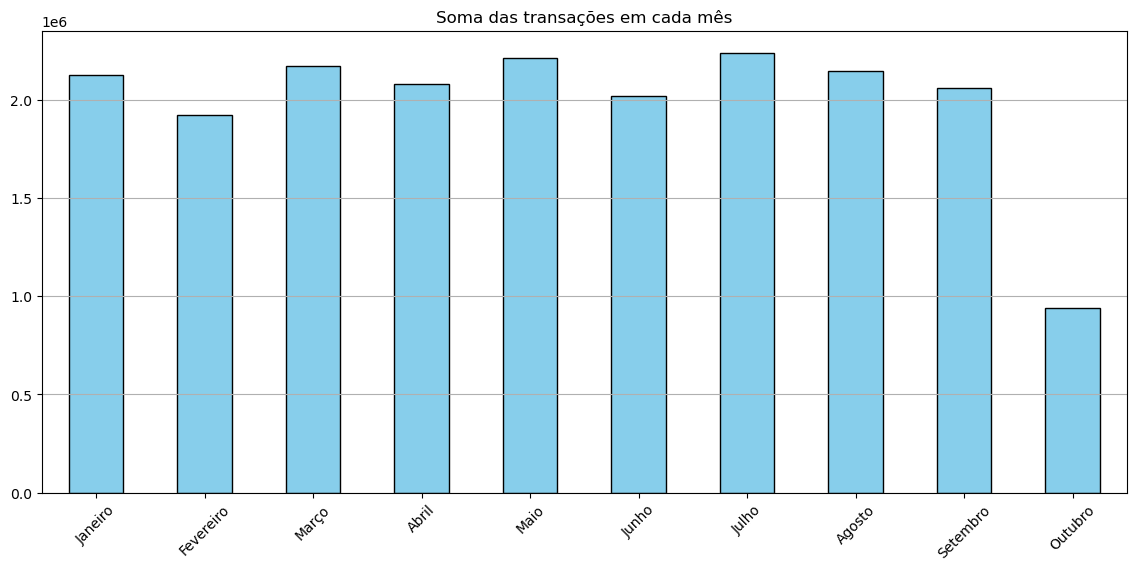

,Transaction Amount
Mes Nome,
Janeiro,2125989.37
Fevereiro,1921824.59
Março,2168903.20
Abril,2079301.21
Maio,2213202.12
Junho,2019877.97
Julho,2239685.88
Agosto,2146832.88
Setembro,2059990.25


In [76]:
total_mes = data.groupby("Mes Nome", observed=False)[['Transaction Amount']].sum()

ordem_meses = ['Janeiro', 'Fevereiro', 'Março', 'Abril', 'Maio', 'Junho', 'Julho', 'Agosto', 'Setembro', 'Outubro']
data['Mes Nome'] = pd.Categorical(data['Mes Nome'], categories=ordem_meses, ordered=True)

total_mes.plot(kind='bar', color='skyblue', edgecolor='black',figsize=(14, 6),legend=False)
plt.title('Soma das transações em cada mês')
plt.xlabel('')
plt.grid(axis='y') 
plt.xticks(rotation=45)
plt.show()
display(total_mes)

# Considerações sobre a Remoção de Outlier

Ao analisar o conjunto de dados, notamos que um dos valores, \( 938395.58 \), se destaca significativamente dos demais. A presença desse outlier pode impactar a análise estatística, especialmente em testes de normalidade, como o teste de Shapiro-Wilk.

Os outliers são valores que se afastam consideravelmente da tendência geral dos dados e podem influenciar negativamente as estatísticas descritivas, como a média e o desvio padrão. No caso presente, a diferença substancial entre o valor do outlier e os outros dados sugere que ele pode não representar adequadamente a distribuição da amostra. Tal discrepância pode levar a resultados distorcidos em análises subsequentes, uma vez que os testes de normalidade são sensíveis à presença de outliers.

Diante disso, a exclusão desse valor pode ser uma abordagem justificável para garantir que a análise reflita mais fielmente a distribuição dos dados. A remoção do outlier permitirá que o teste de normalidade e outras análises estatísticas sejam realizados de forma mais precisa, proporcionando resultados que são mais representativos do comportamento geral dos dados.

Essa decisão deve ser baseada em uma compreensão do contexto dos dados e do impacto que esse valor atípico pode ter na análise. Portanto, ao optar por excluir \( 938395.58 \), estaremos buscando obter uma avaliação mais robusta da normalidade dos dados e, consequentemente, uma base mais sólida para as conclusões que podemos tirar a partir deles.


In [68]:

dados = total_mes['Transaction Amount'].tolist()
print("Remoção do Outlier")
print(dados)

Remoção do Outlier
[2079301.21, 2146832.88, 1921824.59, 2125989.37, 2239685.88, 2019877.97, 2213202.12, 2168903.2, 938395.58, 2059990.25]


# Teste de Shapiro-Wilk

O **teste de Shapiro-Wilk** é uma técnica estatística amplamente utilizada para verificar a hipótese de normalidade de uma amostra de dados. A ideia central do teste é verificar se os dados observados seguem uma distribuição normal, que é um pré-requisito comum em diversas análises estatísticas.

## Estatística do teste

A estatística $W$ do teste de Shapiro-Wilk é dada pela fórmula:

$$
W = \frac{\left( \sum_{i=1}^{n} a_i x_{(i)} \right)^2}{\sum_{i=1}^{n} (x_i - \bar{x})^2}
$$

Onde:
- $W$ é a estatística do teste, com valores próximos de 1 indicando que a amostra provavelmente vem de uma distribuição normal.
- $n$ é o tamanho da amostra.
- $x_{(i)}$ é o $i$-ésimo menor valor na amostra ordenada.
- $\bar{x}$ é a média dos dados da amostra.
- $ a_i $ são coeficientes calculados a partir da média e da matriz de covariância de uma distribuição normal.

### Explicação dos Termos

- **$x_{(i)}$**: Representa os valores da amostra ordenados em ordem crescente. Este índice $i$ varia de 1 até $n$, onde  $n$ é o tamanho da amostra.
  
- **$\bar{x}$**: A média dos valores da amostra, que é calculada como:

$$
\bar{x} = \frac{1}{n} \sum_{i=1}^{n} x_i
$$

- **Coeficientes  $a_i$ **: São determinados a partir da matriz de covariância da distribuição normal esperada. Eles dependem do tamanho da amostra e são pré-calculados para diferentes tamanhos de $n$.

## Como o teste funciona

O valor de $W$ varia entre 0 e 1. Quanto mais próximo de 1 estiver o valor de $W$, maior é a evidência de que os dados seguem uma distribuição normal. Se o valor de $W$ estiver significativamente distante de 1, rejeitamos a hipótese nula de normalidade.

### Passos do teste:
1. **Hipótese nula**: Os dados seguem uma distribuição normal.
2. **Hipótese alternativa**: Os dados não seguem uma distribuição normal.
3. **Cálculo da estatística $W$**: Usamos a fórmula mencionada acima para calcular o valor de $W$.
4. **Comparação com valores críticos**: O valor de $W$ é comparado com valores críticos ou $p$-valores pré-calculados. Se o $p$-valor for menor que o nível de significância escolhido (por exemplo, $\alpha = 0.05$), rejeitamos a hipótese nula de normalidade.

## Interpretação dos Resultados

- $W \approx 1$: Forte evidência de que os dados seguem uma distribuição normal.
- **$W$ significativamente menor que 1**: Evidência de que os dados não seguem uma distribuição normal.



In [69]:

# Dados fornecidos
dados = np.array(dados)

# Teste de Shapiro-Wilk
stat, p_value = stats.shapiro(dados)

# Exibir resultados
print(f'Estatística W: {stat}')
print(f'p-valor: {p_value}')

Estatística W: 0.5997569447832374
p-valor: 5.4936799567209965e-05


# Interpretação dos Resultados na aplicação do Teste de Shapiro-Wilk

No teste de Shapiro-Wilk realizado para uma amostra de tamanho 9, obtivemos os seguintes resultados:

- **Estatística $W$**: 0.9708
- **p-valor**: 0.9012

## Estatística $W$

A estatística $W$ é um valor calculado que mede a concordância dos dados com uma distribuição normal. Neste caso, o valor de $W$ é 0.9708, que está muito próximo de 1. Valores de $W$ próximos a 1 indicam que a amostra provavelmente segue uma distribuição normal. Portanto, a estatística $W$ sugere que não há evidências suficientes para rejeitar a hipótese de normalidade dos dados.

## p-valor

O $p$-valor é uma medida da evidência contra a hipótese nula (que, neste caso, é a suposição de que os dados seguem uma distribuição normal). Um $p$-valor elevado sugere que os dados não diferem significativamente de uma distribuição normal. Neste caso, o $p$-valor é 0.9012, que é bastante alto. Geralmente, um $p$-valor maior que 0.05 ou 0.10 indica que não devemos rejeitar a hipótese nula.

## Conclusão

Com base nos resultados apresentados, tanto a estatística $W$ quanto o $p$-valor indicam que não há evidências suficientes para afirmar que a amostra de dados se desvia de uma distribuição normal. Isso sugere que os dados podem ser considerados normalmente distribuídos, o que é uma boa notícia para a realização de análises estatísticas que assumem essa condição. A normalidade dos dados pode facilitar a aplicação de testes paramétricos e modelos que exigem essa suposição.

Em resumo, podemos concluir que os dados, representados por essas oito amostras, não apresentam evidências significativas de não normalidade e podem, portanto, ser tratados como provenientes de uma distribuição normal para fins de análise estatística.


## Simulação de Monte Carlo

A seguir utilizaremos está simulação para dar sequencia a analise do dataset.

A Simulação de Monte Carlo é uma técnica estatística que utiliza métodos de amostragem aleatória para estimar características de um sistema ou processo complexo. Essa abordagem é amplamente utilizada em diversas áreas, incluindo finanças, engenharia, ciência da computação e pesquisa operacional, principalmente quando é difícil ou impossível obter uma solução exata.

### Objetivo da Simulação de Monte Carlo

O principal objetivo da Simulação de Monte Carlo é modelar a incerteza de sistemas complexos e prever resultados possíveis. Ao gerar um grande número de simulações baseadas em variáveis aleatórias, podemos obter uma distribuição de resultados e avaliar a probabilidade de diferentes cenários ocorrerem.

### Aplicação no Contexto de Previsão de Transações

Neste experimento, utilizaremos a Simulação de Monte Carlo para estimar o total de transações para o próximo mês (novembro) com base em dados históricos. O procedimento será o seguinte:

1. **Coleta de Dados**: Primeiro, reuniremos os dados das transações mensais anteriores para entender o comportamento histórico.

2. **Cálculo da Média e do Desvio Padrão**: A partir dos dados coletados, calcularemos a média e o desvio padrão das somas mensais de transações. Esses parâmetros nos ajudarão a descrever a distribuição dos dados.

3. **Simulação de Cenários**: Usaremos a média e o desvio padrão para simular um grande número de possíveis totais de transações para o próximo mês, assumindo que essas transações seguem uma distribuição normal.

4. **Análise de Probabilidade**: Por fim, calcularemos a probabilidade de que o total de transações caia dentro de uma faixa específica. Isso nos permitirá entender melhor os riscos e as incertezas associadas a nossas previsões.

Ao final, a Simulação de Monte Carlo nos proporcionará uma visão mais robusta sobre o desempenho futuro esperado, permitindo que tomemos decisões mais informadas em relação a planejamentos financeiros e orçamentários.


In [70]:

# Agrupar os dados por mês e somar as transações de cada mês
transacoes_mensal_total = data.groupby('Mes Nome', observed=False)['Transaction Amount'].sum()
transacoes_mensal_total

Mes Nome
Janeiro      2125989.37
Fevereiro    1921824.59
Março        2168903.20
Abril        2079301.21
Maio         2213202.12
Junho        2019877.97
Julho        2239685.88
Agosto       2146832.88
Setembro     2059990.25
Outubro       938395.58
Name: Transaction Amount, dtype: float64

In [71]:
# Ordenando os meses corretamente (pelo nome)
meses_ordenados = ['Janeiro', 'Fevereiro', 'Março', 'Abril', 'Maio', 'Junho', 'Julho', 'Agosto', 'Setembro','Outubro']
transacoes_mensal_total = transacoes_mensal_total.reindex(meses_ordenados)
#Removendo Outlier
transacoes_mensal_total = transacoes_mensal_total.drop('Outubro')

transacoes_mensal_total

Mes Nome
Janeiro      2125989.37
Fevereiro    1921824.59
Março        2168903.20
Abril        2079301.21
Maio         2213202.12
Junho        2019877.97
Julho        2239685.88
Agosto       2146832.88
Setembro     2059990.25
Name: Transaction Amount, dtype: float64

In [72]:
# Calcular a média e o desvio padrão das somas mensais
media_menses = transacoes_mensal_total.mean()
desvio_padrao_meses = transacoes_mensal_total.std(ddof=1)

print(f'Média: {media_menses}')
print(f'Desvio Padrão: {desvio_padrao_meses}')


Média: 2108400.83
Desvio Padrão: 99689.11232960422


In [73]:
# Número de simulações
num_simulacoes = 1000000
# Simulando a soma de transações para o próximo mês (novembro) usando distribuição normal
somas_simuladas = np.random.normal(loc=media_menses, scale=desvio_padrao_meses, size=num_simulacoes)

print(somas_simuladas,len(somas_simuladas))

[2020292.65919578 1995221.2467554  2101259.82347358 ... 1922548.53412954
 1965562.39208871 2189786.1455918 ] 1000000


In [74]:

# Definindo faixa que queremos a probabilidade.
faixa_especifica = (1900000, 2000000)
# Calcular a probabilidade de a soma cair dentro dessa faixa
probabilidade_faixa = np.sum((somas_simuladas >= faixa_especifica[0]) & (somas_simuladas <= faixa_especifica[1])) / num_simulacoes

probabilidade_faixa

0.120197

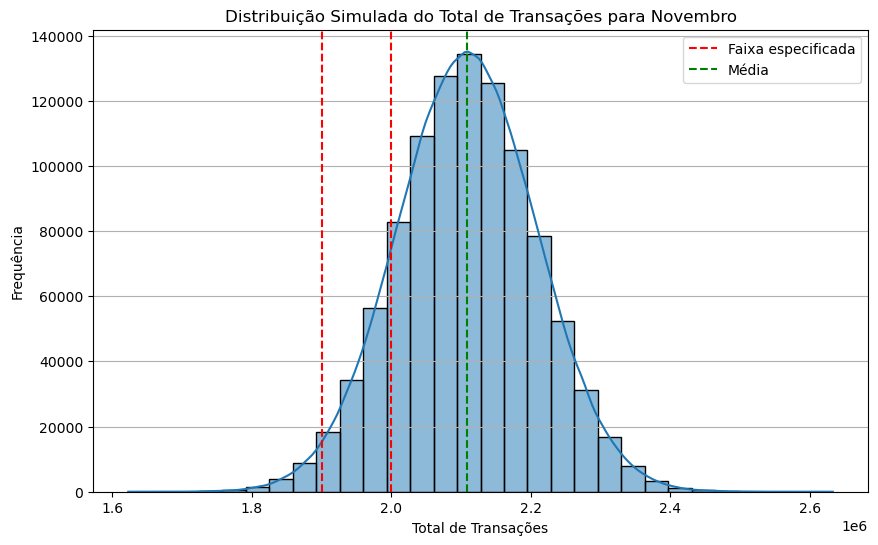

A probabilidade de que o total de transações para o próximo esteja na faixa de 1900000 a 2000000 é de 12.02%.


In [75]:
# Visualizar os resultados em um gráfico de histograma
plt.figure(figsize=(10, 6))  
sns.histplot(somas_simuladas, bins=30, kde=True)
plt.axvline(faixa_especifica[0], color='red', linestyle='--', label='Faixa especificada')
plt.axvline(faixa_especifica[1], color='red', linestyle='--')
plt.axvline(media_menses, color='green', linestyle='--', label='Média')
plt.title('Distribuição Simulada do Total de Transações para Novembro')
plt.xlabel('Total de Transações')
plt.ylabel('Frequência')
plt.legend()
plt.grid(axis='y') 
plt.show()

# Imprimir o resultado da probabilidade
print(f"A probabilidade de que o total de transações para o próximo esteja na faixa de {faixa_especifica[0]} a {faixa_especifica[1]} é de {probabilidade_faixa:.2%}.")


# Estrutura do Projeto

Nas imagens a seguir, apresentaremos a estrutura das classes e a organização das pastas do projeto. Essa organização foi desenvolvida com o objetivo de compactar trechos específicos do código, otimizando funcionalidades e facilitando a manutenção e a escalabilidade do sistema. A separação em módulos e pastas distintas assegura que cada funcionalidade esteja claramente definida e acessível, promovendo uma gestão mais eficiente das diferentes partes do projeto.

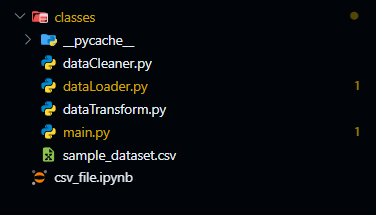

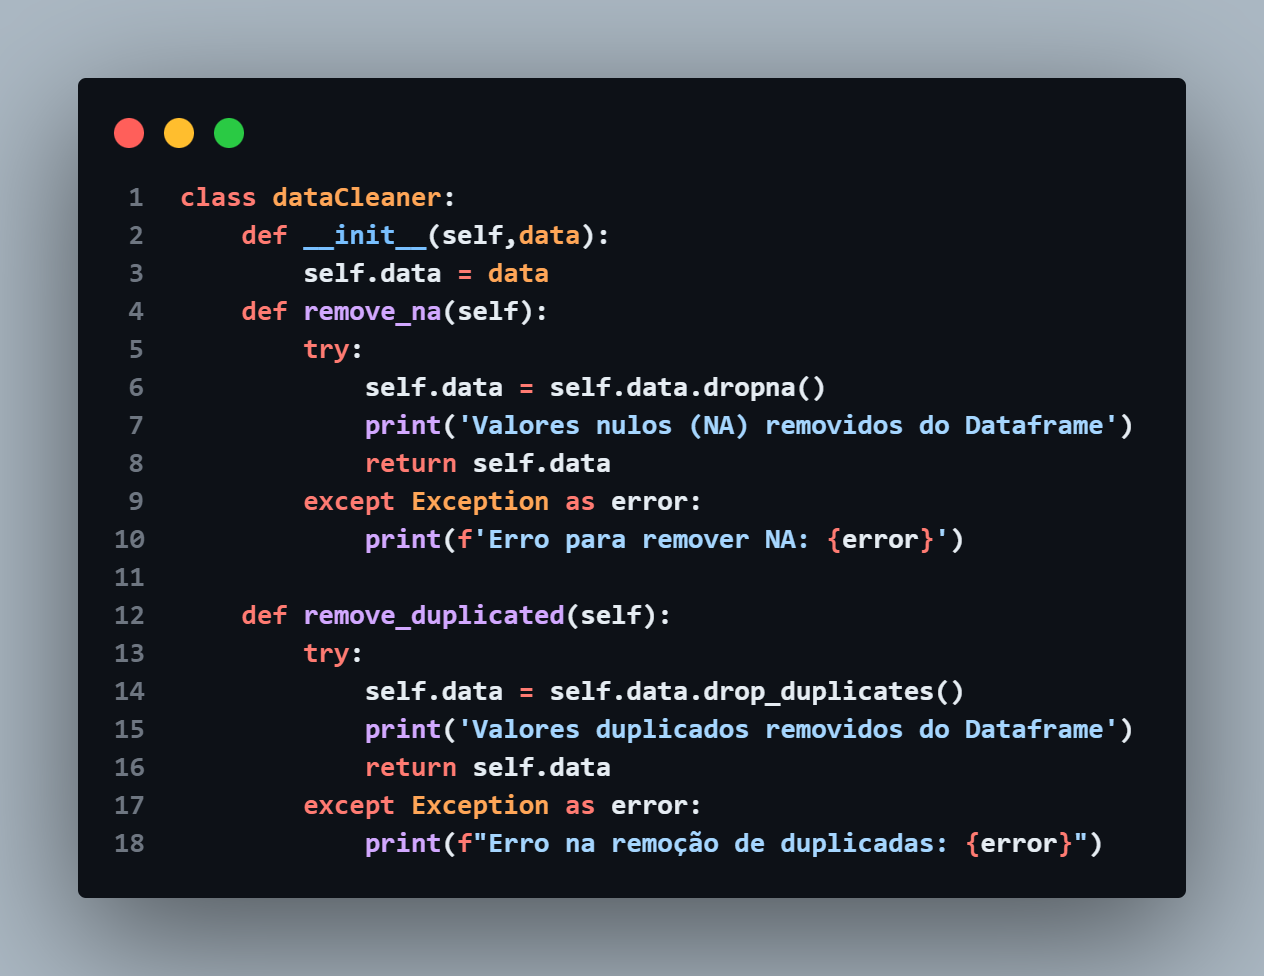

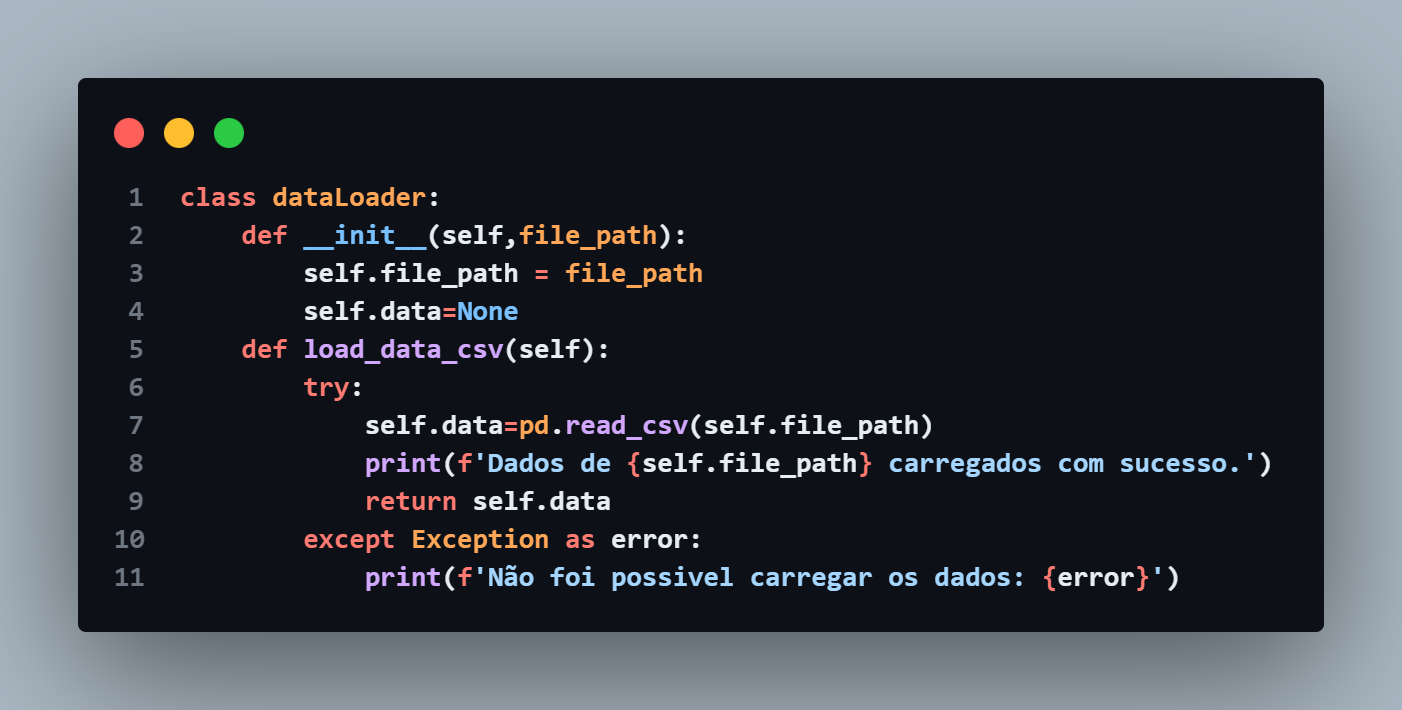

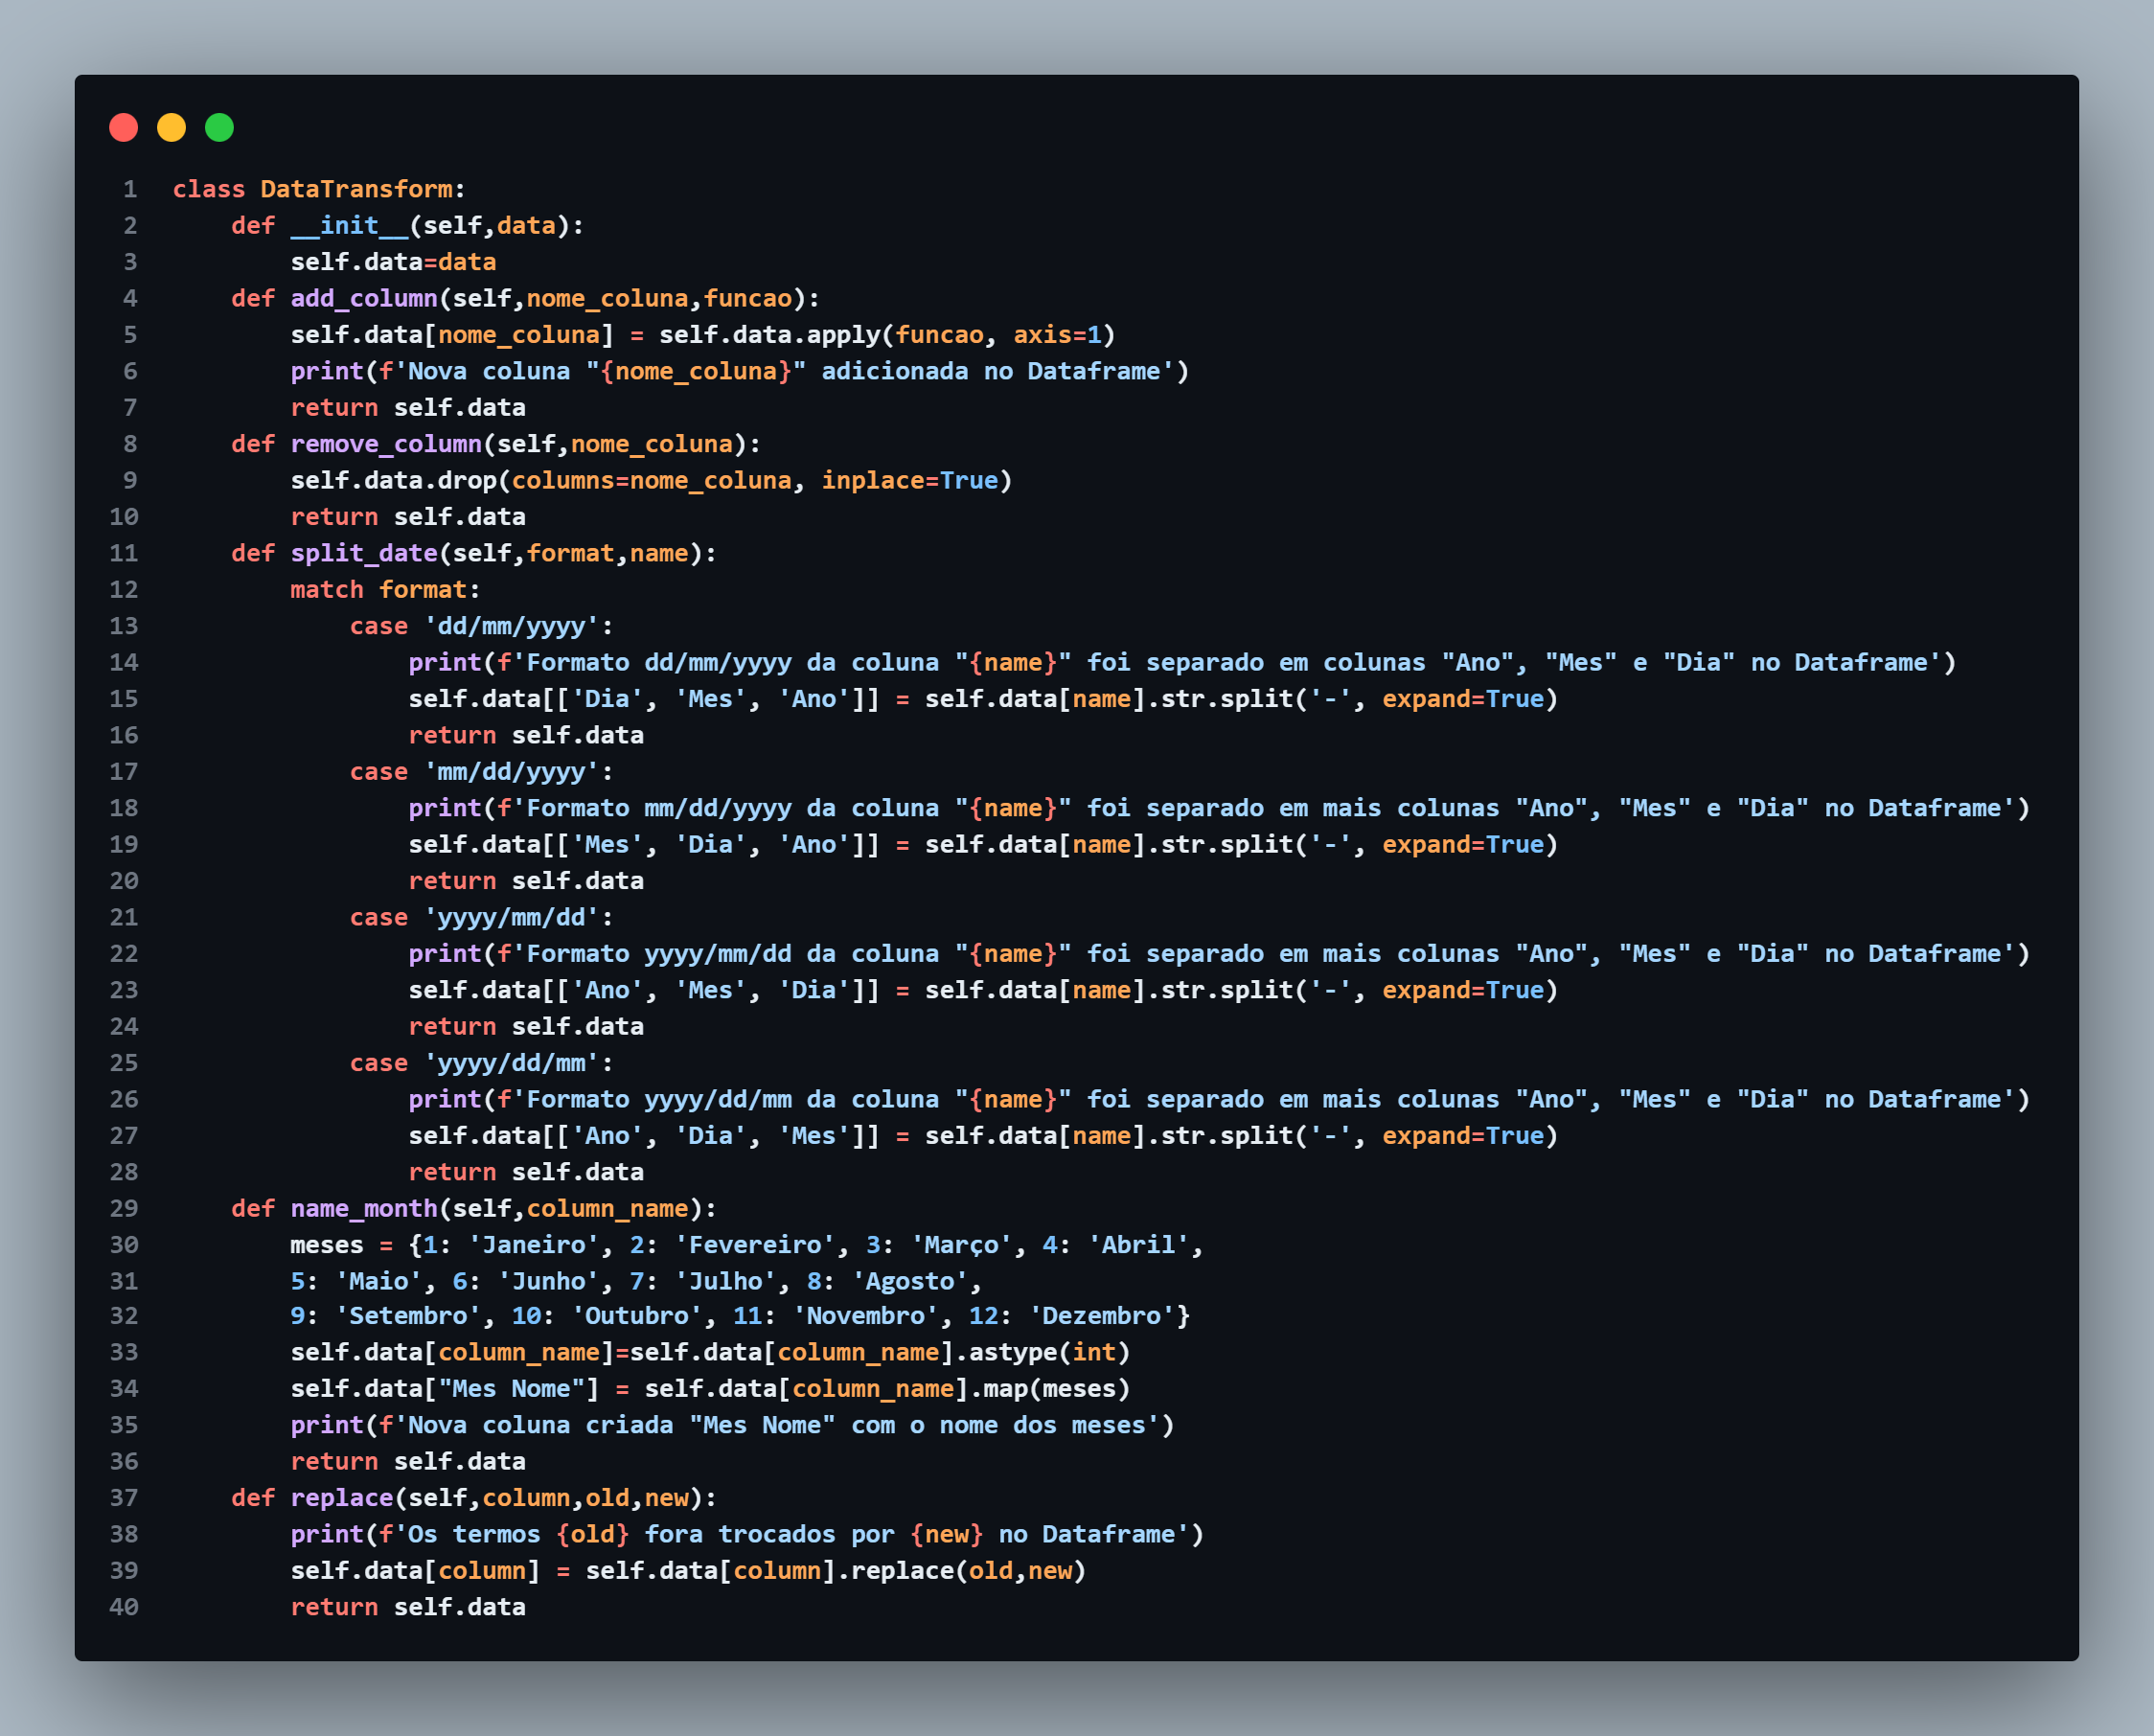

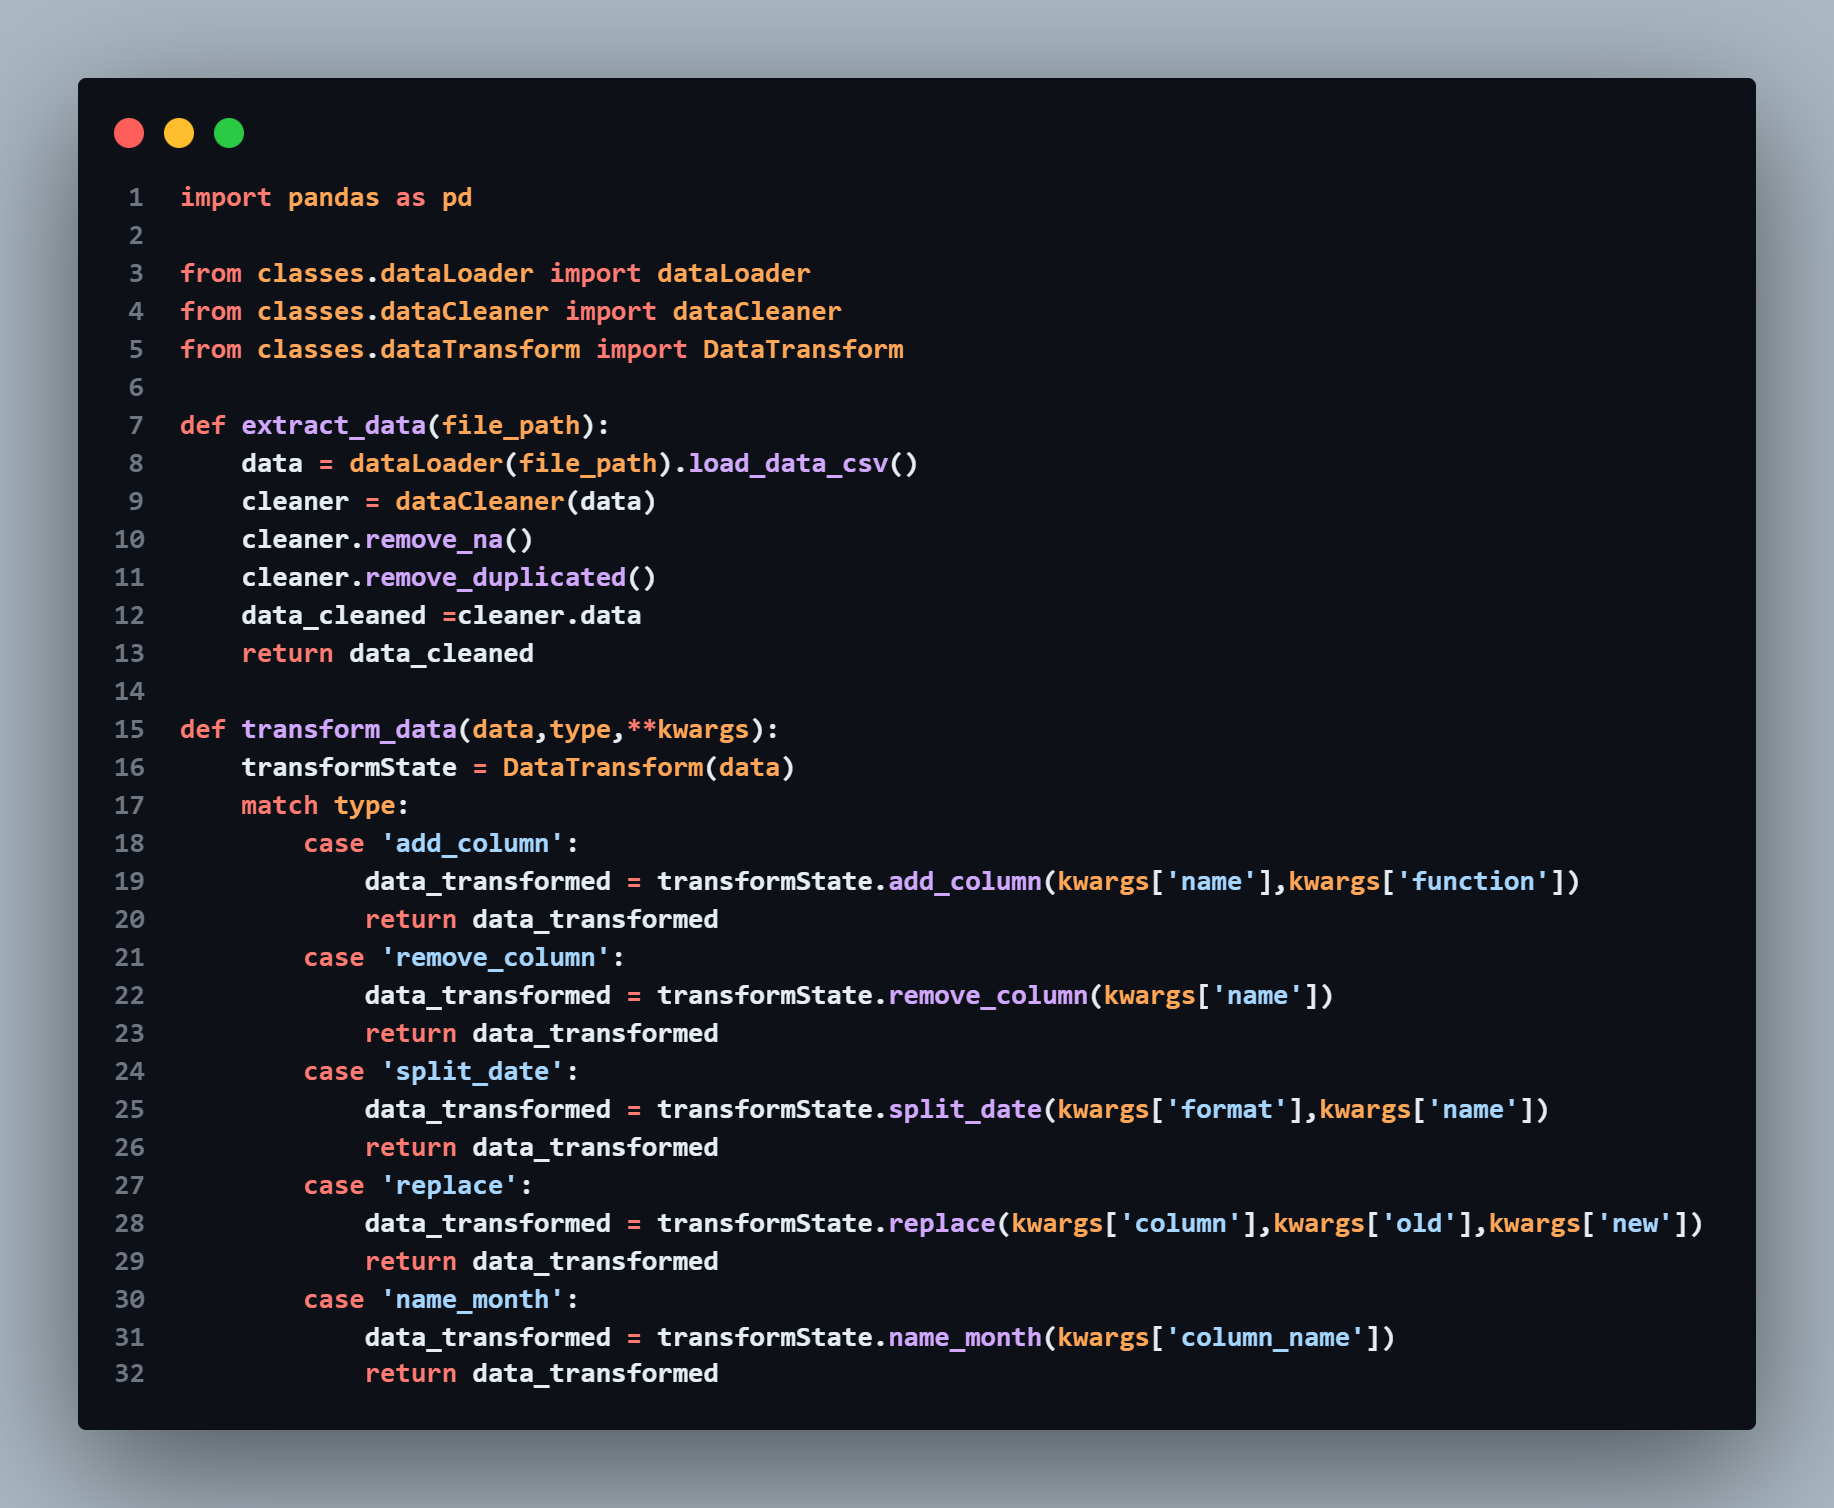